# Name: Sourabh Barala
# Course: M.Sc. Data Science
# Year: 1st
# Reg. No.: 23MSD7044
# Subject: Machine Learning and its Applications
#
#
#
#
#
#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import TransformerMixin
import numpy as np
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix

In [2]:
cancer=load_breast_cancer()

In [3]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names,index=range(len(cancer.data)))

In [4]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

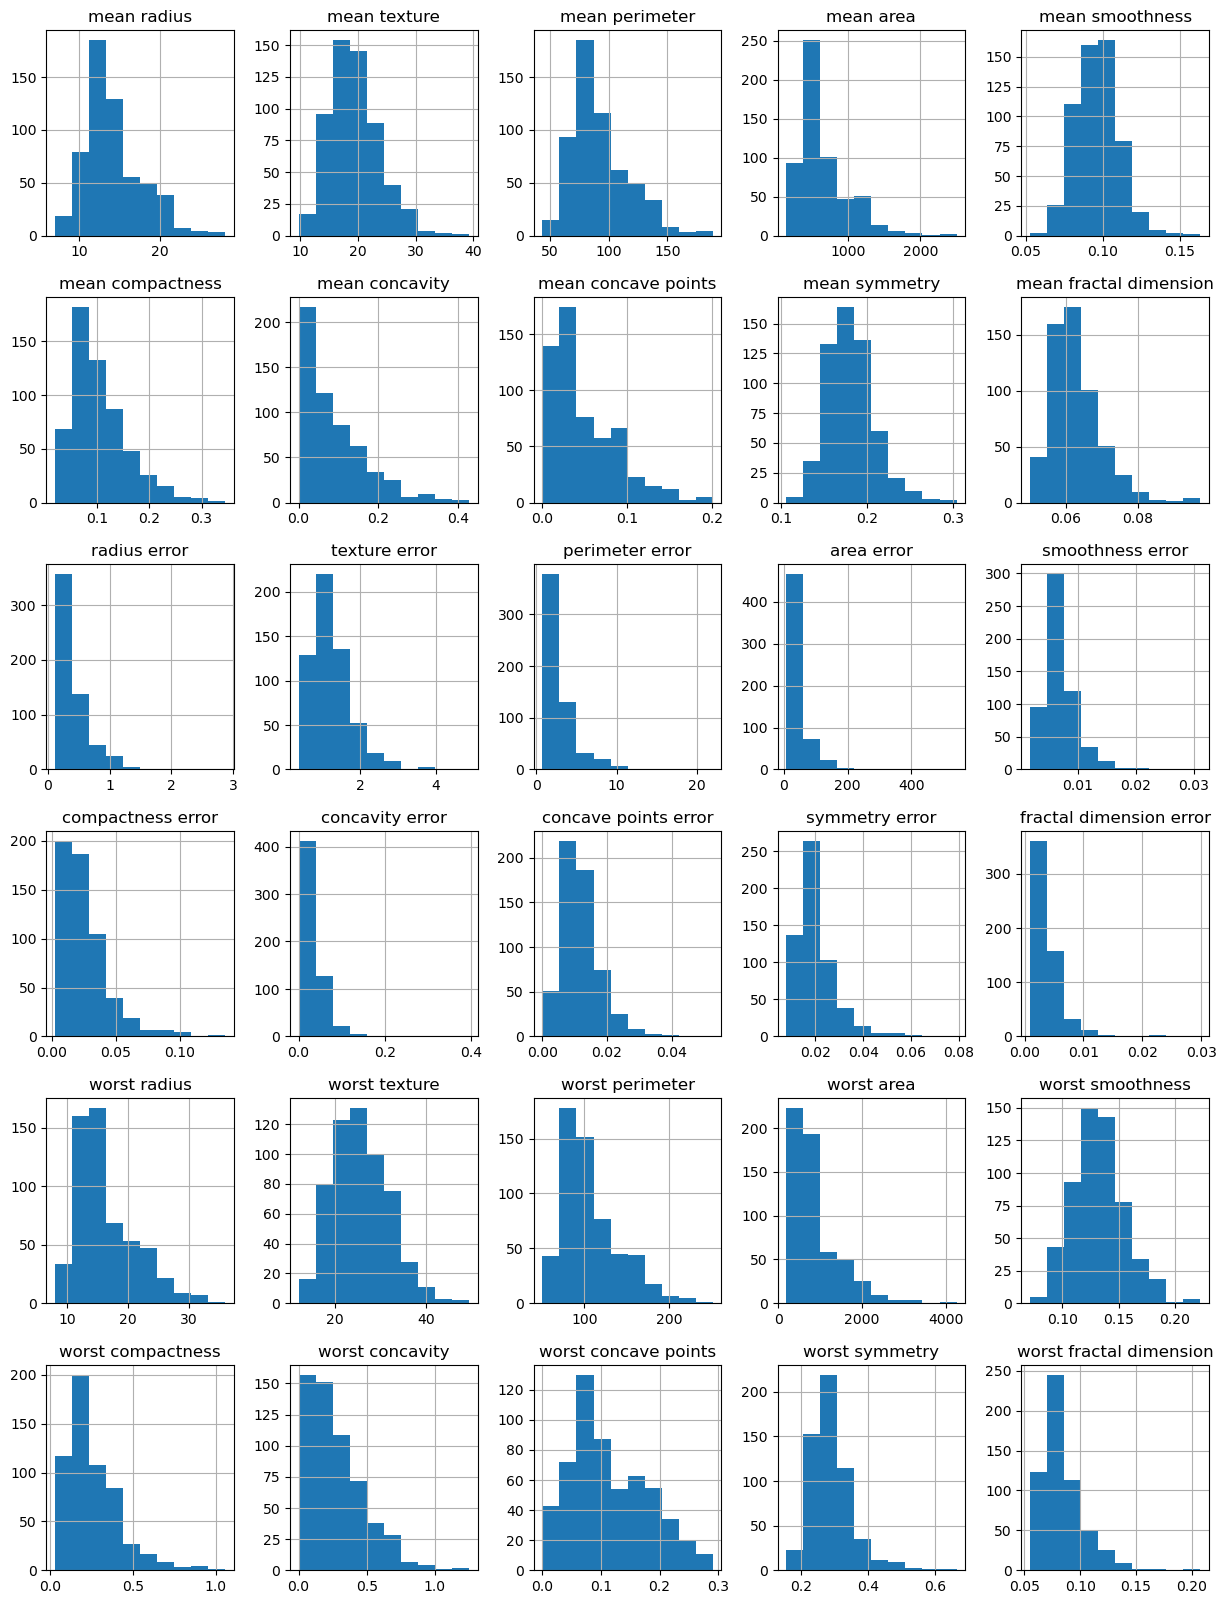

In [6]:
cancer_df.hist(figsize=(15,20))
plt.show()

In [7]:
target=pd.DataFrame(cancer.target,columns=['Target'],index=range(len(cancer.target)))

In [8]:
target_names=cancer.feature_names

In [9]:
target.value_counts()

Target
1         357
0         212
dtype: int64

In [10]:
X_train, X_test, y_train, y_test=train_test_split(cancer_df,target,stratify=target,random_state=100)

In [11]:
class KNN(TransformerMixin):
    def __init__(self,k=3,metric='euclidean'):
        self.k=k
        self.metric=metric
        
    def cal_dist(self,point,train_para,train_label):
        '''takes a point (data point) and calculates its distance (euclidean) with all other data pointes
        input: 
            point: one data point
            train_para: all other data points
            train_label: labels of ecach data points in train_para (1-dimensional)
        
        output:
            DataFrame with distances from a given point to all points, with labels
        
        example:
            input:
                temp_cls.cal_dist(point=X_train.iloc[0],train_para=X_train,train_label=y_train.values.ravel())
                
            output:
                        dist	class
                0	0.000000	1
                1	38.449169	1
                2	271.548671	1
                3	109.262951	1
                4	160.529340	1
                ...	...	...
                421	1252.334390	0
                422	574.286256	0
                423	1519.622517	0
                424	1552.695208	0
                425	184.725959	1   
        '''
        
        dist_ls=list()
        
        for i in range(len(train_para)):
            dims=train_para.iloc[i]
            dist_sqr=0
            for j in range(len(dims)):
                # calculate squared euclidean distance
                dist_sqr+=(dims[j]-point[j])**2
                
            dist=np.sqrt(dist_sqr)
            dist_ls.append(dist)
            
        
        dist_df=pd.DataFrame({'dist':dist_ls,'class':train_label},index=range(len(dist_ls)))
        
        
        return dist_df
    
    def get_closest_class(self,dist_df):
        '''takes DataFrame given by cal_dist function --> sorts the DataFrame according to diatance --> selects top 'k' smallest distances --> returns label with max count 
        input: 
            dist_df: DataFrame given by cal_dist function
        
        output:
            label with max count
        
        example:
            input:
                temp=temp_cls.cal_dist(point=X_train.iloc[0],train_para=X_train,train_label=y_train.values.ravel())
                
                temp_cls.get_closest_k_classes(temp)
                
            output:
                1 
        '''
        sorted_df=dist_df.sort_values(by=['dist'])
        top_k=sorted_df.iloc[:self.k]
        top_k['class'].value_counts()
        closest_class=top_k['class'].value_counts().keys()[0]
        return closest_class
    
    def fit(self,train_para,train_label):
        self.train_para=train_para
        self.train_label=train_label
        
    def predict(self,test_para):
        '''predicts class of each point and appends in a list 
        input: 
            test_para: points to be classified
        
        output:
            list with predicted classes for each point
        
        example:
            input:
                temp_cls.fit(X_train,y_train.values.ravel())
                pred=temp_cls.predict(X_test)
                pred=np.array(pred)
                
            output:
                array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, ....])
        '''
        predictions=list()
        for i in range(len(test_para)):
            dist_df=self.cal_dist(test_para.iloc[i],self.train_para,self.train_label)
            pred=self.get_closest_class(dist_df)
            predictions.append(pred)
        return predictions

In [12]:
temp_cls=KNN(k=10)

In [13]:
temp_cls.fit(X_train,y_train.values.ravel())
pred=temp_cls.predict(X_test)
pred=np.array(pred)

In [14]:
print(confusion_matrix(y_true=y_test,y_pred=pred))
scores=pd.Series({'accuracy':accuracy_score(y_true=y_test,y_pred=pred),
                 'recall':recall_score(y_true=y_test,y_pred=pred),
                 'precision':precision_score(y_true=y_test,y_pred=pred),
                 'f1':f1_score(y_true=y_test,y_pred=pred)})
scores

[[47  6]
 [ 4 86]]


accuracy     0.930070
recall       0.955556
precision    0.934783
f1           0.945055
dtype: float64

## Elbow Method

In [15]:
accuracies_with_k=[]
f1_with_k=[]
precision_with_k=[]
recall_with_k=[]

k_range=range(1,15)
for i in k_range:
    temp_cls=KNN(k=i)
    temp_cls.fit(X_train,y_train.values.ravel())
    pred=temp_cls.predict(X_test)
    
    accuracies_with_k.append(accuracy_score(y_true=y_test,y_pred=pred))
    f1_with_k.append(f1_score(y_true=y_test,y_pred=pred))
    precision_with_k.append(precision_score(y_true=y_test,y_pred=pred))
    recall_with_k.append(recall_score(y_true=y_test,y_pred=pred))
    

In [16]:
metric_df=pd.DataFrame({'k':k_range,'accuracy':accuracies_with_k,'f1':f1_with_k,'precision':precision_with_k,'recall':recall_with_k},index=k_range)

In [17]:
metric_df

,k,accuracy,f1,precision,recall
1,1,0.909091,0.928962,0.913978,0.944444
2,2,0.909091,0.928962,0.913978,0.944444
3,3,0.944056,0.956044,0.945652,0.966667
4,4,0.944056,0.956044,0.945652,0.966667
5,5,0.937063,0.950820,0.935484,0.966667
6,6,0.937063,0.950276,0.945055,0.955556
7,7,0.930070,0.945055,0.934783,0.955556
8,8,0.937063,0.950276,0.945055,0.955556
9,9,0.937063,0.950276,0.945055,0.955556
10,10,0.930070,0.945055,0.934783,0.955556


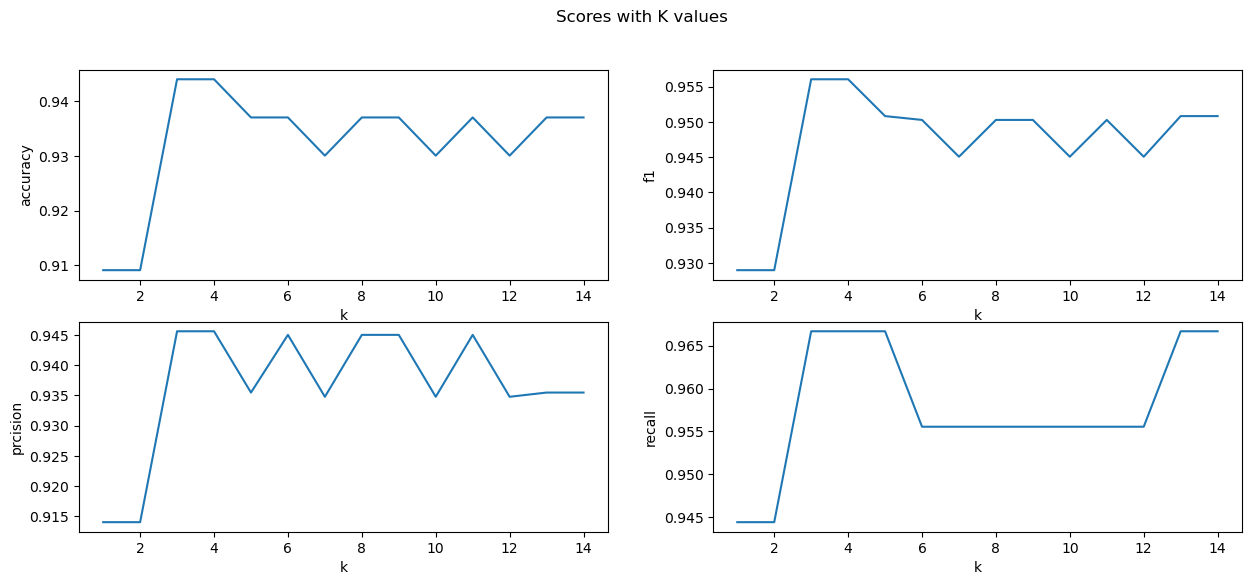

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(metric_df['k'],metric_df['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('k')

plt.subplot(2,2,2)
plt.plot(metric_df['k'],metric_df['f1'])
plt.ylabel('f1')
plt.xlabel('k')

plt.subplot(2,2,3)
plt.plot(metric_df['k'],metric_df['precision'])
plt.ylabel('prcision')
plt.xlabel('k')

plt.subplot(2,2,4)
plt.plot(metric_df['k'],metric_df['recall'])
plt.ylabel('recall')
plt.xlabel('k')

plt.suptitle('Scores with K values')
plt.show()